In [1]:
import matplotlib.pyplot as plt
import json
import re

In [13]:
frequence_list = json.load(open("frequence_list.json", "r"))
print("\n".join([x[0] for x in frequence_list[:10]]))

na
do
nie
że
art
się
dnia
przez
od
sąd


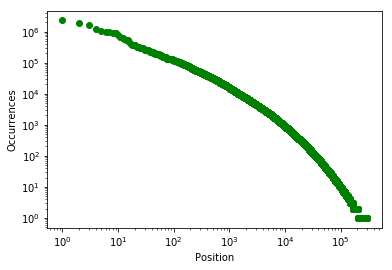

In [3]:
x = [x + 1 for x in range(len(frequence_list))]
y = [y for x, y in frequence_list]

plt.scatter(x, y, c="green")
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")



plt.xlabel("Position")
plt.ylabel("Occurrences")
plt.show()

In [4]:
polish_words = set()
for line in open("polimorfologik-2.1.txt", "r").readlines():
    l, r = re.match("^([^;]+);([^;]+)", line.lower()).group(1, 2)
    polish_words.update((l, r))
    
print(len(polish_words))



4623869


In [5]:
not_in_polish_words = [x[0] for x in frequence_list if x[0] not in polish_words]
print(len(not_in_polish_words))

45542


In [6]:
import random
random.shuffle(not_in_polish_words)
print(not_in_polish_words[:30])

['alkotesu', 'tartanus', 'zachyłkowej', 'paulianskiej', 'du', 'przystepującego', 'repre', 'dwukronie', 'merytorykę', 'niewystraczających', 'zwiazków', 'pogotawia', 'uzwzględnienia', 'żeustalenia', 'wybiram', 'prekarzystą', 'podpróbie', 'odwołujacej', 'now', 'współwłaścieli', 'ustawodastw', 'przednioprawobocznych', 'ponieważać', 'contrarió', 'szz', 'maciończyk', 'wześnia', 'zacyt', 'szczeniu', 'bezspodstawne']


In [7]:
frequence_map = {word: frequency for (word, frequency) in frequence_list if word in polish_words}

In [8]:
from collections import Counter

frequence_map = {word: frequency for (word, frequency) in frequence_list if word in polish_words}

WORDS = Counter(frequence_map)

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'aąbcćdeęfghijklłmnńoóprsśtuwyzźż'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [9]:
print(
    "\n".join(
        ["{:20s} -> {:20s}".format(w, correction(w)) for w in  not_in_polish_words[:30]]
    )
)

alkotesu             -> alkotestu           
tartanus             -> tartaku             
zachyłkowej          -> schyłkowej          
paulianskiej         -> pauliańskiej        
du                   -> do                  
przystepującego      -> przystępującego     
repre                -> reper               
dwukronie            -> dwukrotnie          
merytorykę           -> merytorykę          
niewystraczających   -> niewystarczających  
zwiazków             -> związków            
pogotawia            -> pogotowia           
uzwzględnienia       -> uwzględnienia       
żeustalenia          -> ustalenia           
wybiram              -> wybrał              
prekarzystą          -> prekarzystą         
podpróbie            -> podpróbie           
odwołujacej          -> odwołującej         
now                  -> nowe                
współwłaścieli       -> współwłaścicieli    
ustawodastw          -> ustawodawstw        
przednioprawobocznych -> przednioprawobocznych
ponieważ